In [12]:
! ../.g

[master fee4cb6] web
 2 files changed, 88 insertions(+), 45 deletions(-)
Enumerating objects: 9, done.
Counting objects: 100% (9/9), done.
Delta compression using up to 4 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 1.42 KiB | 69.00 KiB/s, done.
Total 5 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   e386b2b..fee4cb6  master -> master


In [2]:
import numpy as np
import matplotlib.pyplot as plt

#using cplx numbers
def plt_cplx(Z, 
             ax=plt, 
             sty='r'):
    X = [z.real for z in Z]
    Y = [z.imag for z in Z] 
    ax.plot(X,Y,sty)

--- 

# Using a single matrix to represent an affine map.

We can represent an affine transformation
of $\mathbb{R}^n$
by an $(n+1) \times (n+1)$ matrix <br>
so that transformation  composition is matrix multiplication.


## Mathematically

We will construct a homomorphism 

$\text{Aff} (\mathbb{K}^n) \rightarrow \text{GL}_{n+1} (\mathbb{K})$

where $ \mathbb{K} = \mathbb{R}, \mathbb{C}$ is a field.

Let $A\in \text{GL}_{n} (\mathbb{K}), \vec{b} \in \mathbb{K}^n$ 
and consider the affine transformation

$\vec{v} \mapsto A.\vec{v} + \vec{b}$

then its image is the matrix

$\begin{pmatrix} A & \vec{b} \\ 0 &  1 \end{pmatrix} $

the determinant is just $\det A$ so this is inversible.


---


## In the real world



In fact this is how we use affine maps  :

- in [PS files](https://scientificgems.wordpress.com/2014/11/28/mathematics-in-action-affine-transformations-and-postscript/)

- in [game engines](https://docs.unity3d.com/ScriptReference/Matrix4x4.html)

- on the GPU 
[etc](http://graphics.cs.cmu.edu/nsp/course/15-462/Spring04/slides/04-transform.pdf)


[fern fractal in ps](https://www.pvv.ntnu.no/~andersr/fractal/PostScript.html)

[ps matrices explained](http://www.math.ubc.ca/~cass/graphics/text/old.pdf/last/ch4.pdf)

---

## PostScript code

```
%!PS-Adobe-1.0
%%Title:Random Fern
%%Creator:Eric Wicklund
% Last modified: MLO 02 Jan 1993 11:24:14
% Changed: 'save' and 'restore' statements (incorrect grammar);
% length added, and set to 0.001 (0 does not work with Post 1.7).
/m1 [ 0.00 0.00 0.00 0.16 0.00 0.00 ] def
/m2 [ 0.85 -0.04 0.04 0.85 0.00 1.60 ] def
/m3 [ 0.20 0.23 -0.26 0.22 0.00 1.60 ] def
/m4 [ -0.15 0.26 0.28 0.24 0.00 0.44 ] def
/point 72 def
%/length 0 def
/length 0.001 def
%%EndProlog
%%Page: 1 1
/zzz save def
% will draw inside a 8 inch square centered on 8.5 by 11 inch page
4.25 point mul 1.5 point mul translate
0.8 point mul dup scale
% x coordinate ranges from -5 to 5
% y coordinate ranges from 0 to 10
1 setlinecap
0.005 setlinewidth
% First point at origin
0 0
150000 {
% Pick a transformation matrix probabilistically
   /r rand 100 mod def
   r 1 lt { /m m1 def }
 { r 86 lt { /m m2 def }
 { r 93 lt { /m m3 def }
           { /m m4 def } ifelse } ifelse } ifelse
% Make a linear transformation, then
% plot a point at current location
   m transform 2 copy moveto
   length length rlineto
   stroke
} repeat
showpage
zzz restore
%%Trailer
```

---

##  The old way

Here is a fuction to make a binary tree.

```
    f = lambda z: z/2 -1+1J
    g = lambda z: z/2 +1+1J
 ```
 
 means
 
 $f :z \mapsto z/2 -1+1J \\
  g :  z \mapsto  z/2 +1+1J
   $
   
   
 ## The new way
   
The corresponding matrices will be
   
```
L = np.array( [[ .5 , -1+1J ], [0, 1]])
R = np.array( [[ .5, 1+1J ], [0, 1]])
```

ie 

$
\begin{pmatrix} .5 & -1+1J \\ 0 &  1 \end{pmatrix},\,
\begin{pmatrix} .5 & 1+1J \\ 0 &  1 \end{pmatrix} 
$

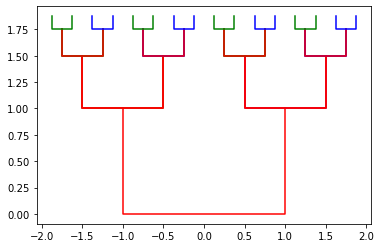

In [3]:
# wrap as a function so that f, g aren't global

def binary_tree(n):
    
    motif = np.array([-1+1J, -1, 1, 1+1J ])
    tree = [motif]
    
    # we can define one line functions like this
    f = lambda z: z/2 -1+1J
    g = lambda z: z/2 +1+1J

    for k in range(n):
        tree = tree + list(map(f, tree)) + list(map(g, tree))

    cols = 'rgb'
    for k, edge in enumerate(tree):
        plt_cplx(edge, sty=cols[k%3])

binary_tree(3)

In [5]:
motif = np.array([-1+1J, -1, 1, 1+1J ])

scale = .5
L = np.array( [[scale, motif[0] ], [0, 1]])
R = np.array( [[scale, motif[-1] ], [0, 1]])


## Composition = matrix multiplication

In [321]:
np.dot(L,R)

array([[ 0.25+0.j , -0.5 +1.5j],
       [ 0.  +0.j ,  1.  +0.j ]])

In [6]:
L @ R

array([[ 0.25+0.j , -0.5 +1.5j],
       [ 0.  +0.j ,  1.  +0.j ]])

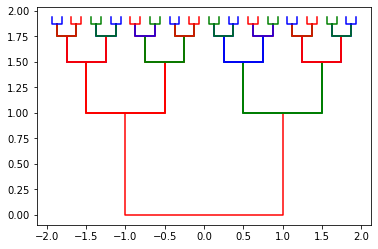

In [7]:
trans = [np.identity(2)]
depth = 4
for k in range(depth):
    # store transformations not points
    trans.extend( [ M @ G
                        for M in trans
                        for G in [L,R]])
cols = 'rgb'
shape = motif
for k, f in enumerate(trans):
    scale, cx = f[0]
    plt_cplx(scale*shape + cx, sty=cols[k%3])

## but we can do better...

by **vectorizing** the list of complex numbers <br>
so that we can apply the affine transformations 
using **just** multiplication.

In [13]:
branch = np.array([-1+1J, -1, 1, 1+1J ])
branch2 = np.ones((2, len(branch)), 
                  dtype=complex)
branch2[0] = branch
R @ branch2

array([[0.5+1.5j, 0.5+1.j , 1.5+1.j , 1.5+1.5j],
       [1. +0.j , 1. +0.j , 1. +0.j , 1. +0.j ]])

# The final solution

Here is my complete solution

---

## Exo

1. Pourquoi ```elts``` et ```generators``` ?
1. Rewrite ```mk_transforms``` using recursion.
1. What happens when ```scale1```, ```scale2``` are complex ($.7 \exp(\pm \pi i/2) \in \mathbb{C}$) ?
1. Modify the generators and the motif to make something like

<img src="./fern.png" width="200">

In [ ]:
def mk_transforms(generators, 
                  depth=4, 
                  dim=2):
    
    elts = [np.identity(dim)]   
    for k in range(depth):
        elts.extend( [np.dot(M,G) 
                        for M in elts
                        for G in generators])
    return elts

## Rewrite

so I rewrote ```mk_transforms``` 

- to be recursive
- so that ```elts``` is a single array so that there are less intermediate ```np.arrays```
- really wanted to use reshape [this trick](https://stackoverflow.com/questions/55483355/reverse-stacking-operation-on-numpy-array)


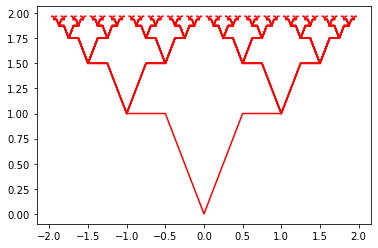

In [299]:
def mk_transforms(generators, 
                  depth=4, 
                  dim=2):
    
    if depth == 0 : return  np.identity(dim) 
    
    elts = mk_transforms(generators, depth=depth-1,  dim=dim)
    # I could avoid an hstack here but 
    # I'm sure it's cheaper than doing a mult by I_n
    return np.hstack([elts, np.hstack([ np.dot(G, elts) 
                                           for G in generators])])


motif = np.array([-1+1J, -.5+1J, 0, .5+1J, 1+1J ])
vec_motif = np.vstack([motif, np.ones_like(motif)] )

scale1 = .5
scale2 = .5
#scale1 = .6*np.exp( np.pi/3 * 1J)
#scale2 = .6*np.exp( -np.pi/3 * 1J)

L = np.array( [[scale1, motif[0] ], [0, 1]])
R = np.array( [[scale2, motif[-1] ], [0, 1]])
transforms = mk_transforms([L,R], depth=5)

#this works but ....the trick with reshape trick is much better
#matrices = [transforms[:,k: k+2] for k in range(0, transforms.shape[1] , 2) ]

# the -1 means the calculation transforms.shape[2]//2 is automatic
for f in transforms.reshape(2,-1,2).swapaxes(0,1):
    plt_cplx( np.dot(f, vec_motif)[0])


In [322]:
# this makes an array of 2x2 matrices
transforms.reshape(2,-1,2).swapaxes(0,1)[:5]


array([[[ 1.  +0.j ,  0.  +0.j ],
        [ 0.  +0.j ,  1.  +0.j ]],

       [[ 0.5 +0.j , -1.  +1.j ],
        [ 0.  +0.j ,  1.  +0.j ]],

       [[ 0.5 +0.j ,  1.  +1.j ],
        [ 0.  +0.j ,  1.  +0.j ]],

       [[ 0.5 +0.j , -1.  +1.j ],
        [ 0.  +0.j ,  1.  +0.j ]],

       [[ 0.25+0.j , -1.5 +1.5j],
        [ 0.  +0.j ,  1.  +0.j ]]])

----

# Escalier du diable encore

In fact I've written ```mk_transforms``` to be polyvalent.
I can use it with $3 \times 3$ matrices too.

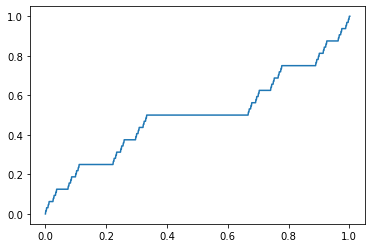

In [264]:
def mk_transforms(generators, 
                  depth=4, 
                  dim=2):
    
    elts = [np.identity(dim)]   
    for k in range(depth):
        elts.extend( [np.dot(M,G) 
                        for M in elts
                        for G in generators])
    return elts

motif = np.array([[0,0,1],[1,1,1], [2,1,1]]).T

#scaling
L = np.array( [[1/3, 0 ,0], [ 0, 1/2 ,0], [0, 0, 1]])
#scaling then translation by (2/3, 1/2)
R = np.copy(L)
R[:2,-1] = np.array([2/3, 1/2])

n = 6
transforms = mk_transforms([L,R], depth=n, dim=3)

pts = np.hstack( [np.dot(f, motif) 
                  for f in transforms[-2**n::]])
X,Y,Z = pts
plt.plot(X,Y);

In [1281]:
ss = '''/m1 [ 0.00 0.00 0.00 0.16 0.00 0.00 ] def
/m2 [ 0.85 -0.04 0.04 0.85 0.00 1.60 ] def
/m3 [ 0.20 0.23 -0.26 0.22 0.00 1.60 ] def
/m4 [ -0.15 0.26 0.28 0.24 0.00 0.44 ] def'''

In [1291]:
arrs = [x.split()[2:-2] for x in ss.split('\n')]
arrs = [[float(x) for x in r] for r in arr]

[ np.array(x) for x in arrs]

[array([0.  , 0.  , 0.  , 0.16, 0.  , 0.  ]),
 array([ 0.85, -0.04,  0.04,  0.85,  0.  ,  1.6 ]),
 array([ 0.2 ,  0.23, -0.26,  0.22,  0.  ,  1.6 ]),
 array([-0.15,  0.26,  0.28,  0.24,  0.  ,  0.44])]

---

# Marche aléatoire

En mathématiques, en économie et en physique théorique, une marche aléatoire est 
un modèle mathématique d'un système possédant une dynamique discrète composée 
d'une succession de pas aléatoires, ou effectués « au hasard ».
On emploie également fréquemment les expressions marche au hasard, promenade aléatoire ou random walk en anglais. 
Ces pas aléatoires sont de plus totalement décorrélés les uns des autres ; cette dernière propriété, fondamentale, est appelée caractère markovien du processus, du nom du mathématicien Markov. 

Elle signifie intuitivement qu'à chaque instant, le futur du système dépend de son état présent, mais pas de son passé, même le plus proche. 
Autrement dit, le système « perd la mémoire
» à mesure qu'il évolue dans le temps. 
Pour cette raison, une marche aléatoire est parfois aussi appelée « marche de l'ivrogne ».

1. [PageRank](https://math.lionel.fourquaux.org/teaching/pagerank.pdf)
1. [PF, Markov, Google](https://perso.univ-rennes1.fr/bachir.bekka/Perron-Frobenius-Google.pdf)

## Visualising a random walk on $\mathbb{Z}$

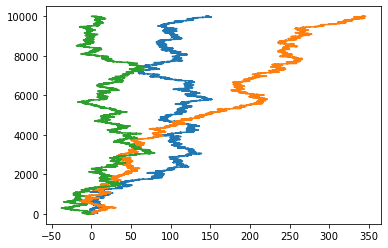

In [663]:
gens = [-1,1]
len_walk = 10000

for k in range(3):
    dirs = np.random.choice(gens,len_walk)
    pos =  np.cumsum(dirs)
    plt.plot(pos, np.arange(len_walk));


## Visualising a random walk on (a subgroup of) $\mathbb{Z}^2$

Here is a trick to do a walk on a subgroup of $\mathbb{Z}^2$
can you see which group it is ?

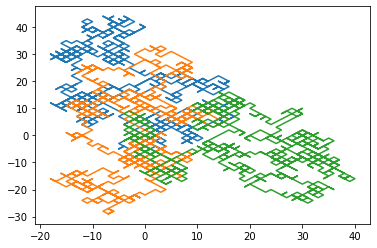

In [1011]:
X = [-1,1]
len_walk = 1000

for k in range(3):
    x_dir = np.random.choice(gens,len_walk)
    y_dir =  np.random.choice(gens,len_walk)
    dirs = np.vstack((x_dir,y_dir))
    pos =  np.cumsum(dirs, axis=1)

    plt.plot(pos[0],pos[1]);

## Visualising a random walk on the whole of $\mathbb{Z}^2$

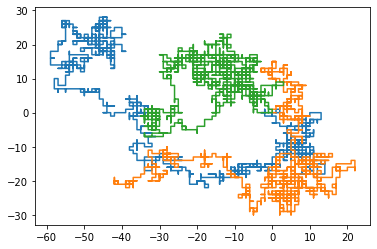

In [661]:
X = [0,0,1,-1]
Y = [1,-1,0,0]

gens  = np.array([X,Y]).T
len_walk = 1500

for k in range(3):

    dirs =  gens[np.random.choice(np.arange(4),len_walk)]
    pos =  np.cumsum(dirs, axis=0)

    plt.plot(pos[:,0],pos[:,1]);

## Visualising a random walk on $\mathbb{Z}/n\mathbb{Z}$

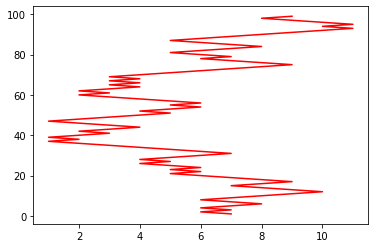

In [772]:
gens = [-1,1]
len_walk = 100
n = 17
for k in range(1):
    dirs = np.random.choice(gens,len_walk)
    pos =  (np.cumsum(dirs)  + 8 ) %  n
    
    epts = [-1] + np.where(np.abs(pos[1:] - pos[:-1]) >1)[0].tolist() + [-1]
    
    paths = [pos[a + 1:b] for a,b in zip(epts, epts[1:])]
    ll = 0
    for p in paths:
        plt.plot(p, np.arange(ll, ll + len(p)) + 1, 'r-' );
        ll += len(p)

## Code optimisation for speed 

As usual we'll use ```reshape``` to speed things up.

- there is a memory penalty for this but I have 8G of RAM.

We want speed because we are going to look at a large sample of walks to see where they finish.

-  we'll plot the distribution of the finishing point in a histogram.
- from this  we'll see that a random walk on $\mathbb{Z}$ often doesn't get far away

In [784]:
2*np.random.randint(0,2,10) -1

array([-1,  1, -1, -1, -1,  1, -1, -1,  1, -1])

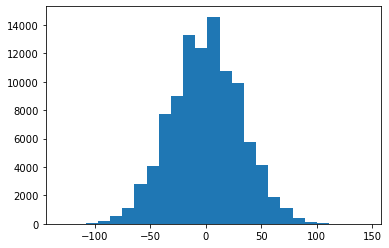

In [1266]:
#%%timeit

gens = [-1,1]
len_walk = 1000
num_walks = 10**5

#this is a list of length num_walks
#end_pts = [np.random.choice(gens,len_walk).sum() for k in range(num_walks)]

#this is 4 times faster
#but the array is much much bigger =  len_walk*num_walks
#how many 16mp images is that ?
walks = 2*np.random.randint(0,2, len_walk*num_walks) - 1
end_pts = walks.reshape(len_walk,  num_walks).sum(axis=0)
plt.hist(end_pts, bins= 25);


## We can calculate the probability recursively


Let 
$P(n,k)$ := probability that a walk of length 
$n$ has  $k$ 1's and $n-k$ -1's

The last element of a walk of length $n+1$ with  $k$ 1's
was either -1 or 1 so that it the first part was either:

- a a walk of length $n$ with  $k$ 1's
- a walk of length $n$ with  $k-1$ 1's

both are equally likely.

So

$P(n+1,k)  = .5*P(n,k)  + .5*P(n, k-1)$


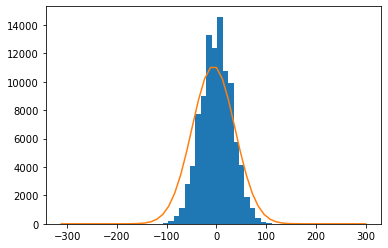

In [1268]:
plt.hist(end_pts, bins= 25);
plt.plot(180/15*(np.arange(len(T)) - len(T)/2), num_walks*T);

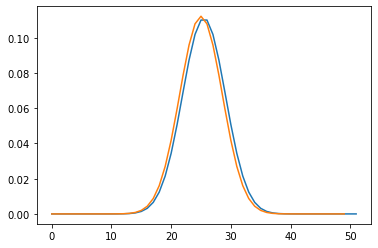

In [1276]:
P = np.ones(2)*.5
len_walk = 50

#this is actually Pascal's triangle with .5 as a scale
#rewrite it as a recursive function
for i in range(len_walk):
    T = np.zeros(len(P)+1) 
    T[[0,-1]] = .5*P[[0,-1]]
    
    T[1:-1] = .5*P[1:] + .5*P[:-1]
    P = T

plt.plot(T);

# actually  it's a binomial distribution
from scipy.stats import binom
X = np.arange(len_walk) 
plt.plot(binom.pmf(X, len_walk, .5));


## Exo :

Change the code to do a random walk on a [triangular lattice](https://en.wikipedia.org/wiki/Hexagonal_lattice)

The hexagonal lattice or triangular lattice is one of the five 2D lattice types.

Three nearby points form an equilateral triangle. In images, four orientations of such a triangle are by far the most common. They can conveniently be referred to by viewing the triangle as an arrow, as pointing up, down, to the left, or to the right; although in each case they could also be considered to point into two oblique directions.

---

### Possible project :

Do something like this 

http://naturalunits.blogspot.com/2013/05/brownian-motion.html

---

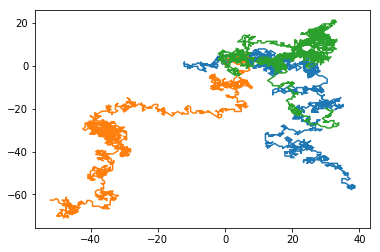

In [10]:
T = np.linspace(0, 2*np.pi, 9)[:-1]
X, Y = np.cos(T), np.sin(T)

gens  = np.array([X,Y]).T
len_walk = 1500

for k in range(3):

    dirs =  gens[np.random.choice(np.arange(len(T)),len_walk)]
    pos =  np.cumsum(dirs, axis=0)

    plt.plot(pos[:,0],pos[:,1]);

In [18]:

! ../.g


[master aa005cf] web
 1 file changed, 10 insertions(+), 10 deletions(-)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 444 bytes | 49.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   ed9467e..aa005cf  master -> master


---

# Graphe orienté et sa matrice d'adjacence


Dans la théorie des graphes, un graphe orienté $G=(V,A)$ est un couple formé de 

- $ V$ un ensemble de nœuds  
- $A$ un ensemble d'arcs, chaque arc étant associé à un couple de nœuds selon une direction représentée par une flèche.


[Source : Wiki](https://fr.wikipedia.org/wiki/Graphe_orient%C3%A9)


--- 

## Exemple

[source : stack](https://stackoverflow.com/questions/29572623/plot-networkx-graph-from-adjacency-matrix-in-csv-file)

In [15]:
from numpy import genfromtxt
import numpy as np

import requests
r = requests.get(url='https://raw.githubusercontent.com/macbuse/macbuse.github.io/master/PROG/graph.csv')
with open("graph.csv",'w') as fp:
          fp.write(r.text)

mydata = genfromtxt('graph.csv', delimiter=',')
print(mydata)

[[nan nan nan nan nan]
 [nan  0.  1.  0.  1.]
 [nan  1.  0.  1.  0.]
 [nan  0.  1.  0.  1.]
 [nan  1.  0.  1.  0.]]


In [12]:
r.text

',a,b,c,d\na,0,1,0,1\nb,1,0,1,0\nc,0,1,0,1\nd,1,0,1,0'

In [16]:
adjacency = mydata[1:,1:].astype(np.int)

adjacency[0,1:] = 1
adjacency[1:-1,0] = 0
print(adjacency)

[[0 1 1 1]
 [0 0 1 0]
 [0 1 0 1]
 [1 0 1 0]]


In [17]:
import networkx as nx

def show_graph(adjacency_matrix, my_labels=None):
    
    #rows, cols = np.where(adjacency_matrix == 1)
    #edges = zip(rows.tolist(), cols.tolist())
    edges = np.vstack( np.nonzero(adjacency_matrix) ).T
    gr = nx.DiGraph()
    gr.add_edges_from(edges)
    pos = nx.spring_layout(gr) 
    
    if not my_labels:
        my_labels = {k : k for k in range(adjacency_matrix.shape[0])} 
    nx.draw(gr, pos, node_size=500,
            connectionstyle='arc3, rad = 0.1',
            labels=my_labels, with_labels=True)
  


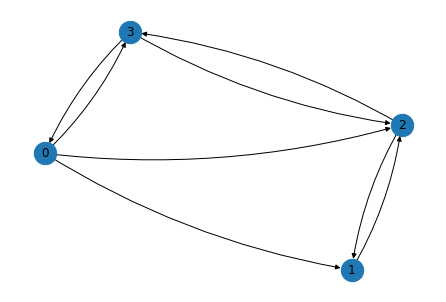

In [18]:
show_graph(adjacency)

## Chaîne de Markov

En mathématiques, une chaîne de Markov est un processus de Markov à temps discret, 
ou à temps continu et à espace d'états discret.
Un processus de Markov est un processus stochastique possédant la propriété de Markov 
: l'information utile pour la prédiction du futur est entièrement contenue dans l'état présent du processus 
    et n'est pas dépendante des états antérieurs (le système n'a pas de « mémoire »). 
Les processus de Markov portent le nom de leur inventeur, Andreï Markov.


### Graphe  G d'une chaîne de Markov

Le graphe G d'une chaîne de Markov est un graphe orienté défini à partir 
1. de l'espace d'états  E 
2. de la matrice de transition :
$ P=\left (p_{i,j} \right)_{(i,j)\in E^{2} }
$
de cette chaîne de Markov.

- les sommets de  G sont les éléments de E
- les arêtes de G sont les couples $ (i,j)\in E^{2}$
vérifiant $p_{i,j}>0.$

[Source : Wiki](https://fr.wikipedia.org/wiki/Graphe_d%27une_cha%C3%AEne_de_Markov_et_classification_des_%C3%A9tats#Graphe_d'une_cha%C3%AEne_de_Markov)

In [472]:
vals, vecs = np.linalg.eig(adjacency)

In [458]:
np.linalg.det(adjacency)

0.0

In [513]:
max(vals), vals

(1.8793852415718173,
 array([ 1.87938524e+00, -1.53208889e+00, -3.47296355e-01, -5.58956869e-16]))

In [476]:
vecs[:,vals == max(vals)]

array([[0.6565385 ],
       [0.22801343],
       [0.42852507],
       [0.57735027]])

In [512]:
np.dot( vecs.T, vecs)*3

array([[ 3.00000000e+00,  0.00000000e+00, -6.66133815e-16,
         7.41055346e-01],
       [ 0.00000000e+00,  3.00000000e+00,  1.12410081e-15,
        -3.15705916e-01],
       [-6.66133815e-16,  1.12410081e-15,  3.00000000e+00,
        -2.61747335e+00],
       [ 7.41055346e-01, -3.15705916e-01, -2.61747335e+00,
         3.00000000e+00]])

---

## Théorème de Perron-Frobenius

En algèbre linéaire et en théorie des graphes, le théorème de Perron-Frobenius,
démontré par Oskar Perron et Ferdinand Georg Frobenius, 
a d'importantes applications en théorie des probabilités (chaînes de Markov),
en théorie des systèmes dynamiques, en économie (analyse entrée-sortie1), 
en théorie des graphes, en dynamique des populations2 (matrices de Leslie (en)) 
et dans l'aspect mathématique du calcul des [pagerank de Google](https://fr.wikipedia.org/wiki/PageRank).


[Source : Wiki](https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_de_Perron-Frobenius)

---

Soit $A$ une matrice , on appelle rayon spectral de  A,
et on note $\rho(A)$ et on a  

$\rho(A)= \max |\lambda_i|$.
Il est toujours inférieur ou égal à la norme d'opérateur de  A.

$\rho(A) \leq \| A \| := \sup_{v \neq 0} \|Av\| / \|v\|.$


1. Le rayon spectral  $\rho$ de $A$ est une valeur propre **simple** de $A$, 
2. Le  sous-espace propre associé est une droite vectorielle engendrée par un vecteur (colonne) strictement positif.

---

Le **PageRank** est l'algorithme d'analyse des liens concourant au système de classement des pages Web utilisé par le moteur de recherche Google. Il mesure quantitativement la popularité d'une page web. Le PageRank n'est qu'un indicateur parmi d'autres dans l'algorithme qui permet de classer les pages du Web dans les résultats de recherche de Google. Ce système a été inventé par Larry Page, cofondateur de Google. 

---
## Algorithm 

[Source : Wiki (english)](https://en.wikipedia.org/wiki/Perron%E2%80%93Frobenius_theorem#Power_method_and_the_positive_eigenpair)

## Power method and the positive eigenpair

For a positive (or more generally irreducible non-negative) matrix A the dominant eigenvector is real and strictly positive (for non-negative A respectively non-negative.)

This can be established using the power method, which states that for a sufficiently generic (in the sense below) matrix A the sequence of vectors 

$b_{k+1} = Ab_k / \| Ab_k \|$

converges to the eigenvector with the maximum eigenvalue. 

- The initial vector $b_0$ can be chosen arbitrarily except for some measure zero set). 

- Starting with a non-negative vector  $b_0$ produces the sequence of non-negative vectors  $b_k$. 

- Hence the limiting vector $\lim_k b_k$ is also non-negative.



By the power method this limiting vector is the dominant eigenvector for A, proving the assertion. The corresponding eigenvalue is non-negative.

The proof requires two additional arguments. 

1.  the power method converges for matrices which do not have several eigenvalues of the same absolute value as the maximal one. The previous section's argument guarantees this.

2.  to ensure strict positivity of all of the components of the eigenvector for the case of irreducible matrices. This follows from the following fact, which is of independent interest:

---
Lemma: given a positive (or more generally irreducible non-negative) matrix A and v
as any non-negative eigenvector for A, 
then it is necessarily strictly positive and the corresponding eigenvalue is also strictly positive.

---

## Apply this to $A$ the adjacency matrix

In [579]:
b = np.array([1,0,0,0])


for k in range(30):
    b = np.dot(adjacency,b)
    #normalise so that b is a probability distribution
    b = b/np.sum(b)
    # avoid division by 0
    
    if min(b) > 0 :
         print(k, np.dot(A,b)/ b)
        

4 [2.5        0.33333333 9.         0.83333333]
5 [1.5        9.         0.66666667 3.8       ]
6 [2.26666667 0.66666667 4.66666667 1.10526316]
7 [1.61764706 4.66666667 0.96428571 2.95238095]
8 [2.12727273 0.96428571 3.33333333 1.32258065]
9 [1.7008547  3.33333333 1.21111111 2.52439024]
10 [2.04020101 1.21111111 2.72477064 1.48792271]
11 [1.75862069 2.72477064 1.4040404  2.28246753]
12 [1.98459384 1.4040404  2.39808153 1.60881935]
13 [1.79816514 2.39808153 1.548      2.13704686]
14 [1.94858713 1.548      2.20736434 1.69466281]
15 [1.82497482 2.20736434 1.65174129 2.04638672]
16 [1.92506346 1.65174129 2.09053863 1.75435457]
17 [1.84303159 2.09053863 1.72463768 1.98857531]
18 [1.90960557 1.72463768 2.01685587 1.79526024]
19 [1.85513927 2.01685587 1.77495675 1.95117816]
20 [1.89940906 1.77495675 1.96952475 1.82301256]
21 [1.86323376 1.96952475 1.80926592 1.92676174]
22 [1.89266619 1.80926592 1.93876238 1.84171322]
23 [1.86863449 1.93876238 1.83246301 1.91072393]
24 [1.88819976 1.83246301 

In [578]:
sum(b), b


(1.0, array([0.34767821, 0.12002973, 0.22764848, 0.30464359]))

## Apply this to columns of $A$

In [1070]:
b = adjacency.copy().astype(np.float)
#convert to a matrix of probablities
#don't really need to do this
#for k, row in enumerate(A):
#   A[k] = row / np.sum(row)
    
for k in range(30):
    b = np.dot(adjacency,b)
    #normalise 
    b = b/np.max(b)
    # avoid division by 0
    
    if np.min(b) > 0 :
         print(k, np.dot(A,b)[:,0] / b[:,0])

3 [2.5        0.33333333 9.         0.83333333]
4 [1.5        9.         0.66666667 3.8       ]
5 [2.26666667 0.66666667 4.66666667 1.10526316]
6 [1.61764706 4.66666667 0.96428571 2.95238095]
7 [2.12727273 0.96428571 3.33333333 1.32258065]
8 [1.7008547  3.33333333 1.21111111 2.52439024]
9 [2.04020101 1.21111111 2.72477064 1.48792271]
10 [1.75862069 2.72477064 1.4040404  2.28246753]
11 [1.98459384 1.4040404  2.39808153 1.60881935]
12 [1.79816514 2.39808153 1.548      2.13704686]
13 [1.94858713 1.548      2.20736434 1.69466281]
14 [1.82497482 2.20736434 1.65174129 2.04638672]
15 [1.92506346 1.65174129 2.09053863 1.75435457]
16 [1.84303159 2.09053863 1.72463768 1.98857531]
17 [1.90960557 1.72463768 2.01685587 1.79526024]
18 [1.85513927 2.01685587 1.77495675 1.95117816]
19 [1.89940906 1.77495675 1.96952475 1.82301256]
20 [1.86323376 1.96952475 1.80926592 1.92676174]
21 [1.89266619 1.80926592 1.93876238 1.84171322]
22 [1.86863449 1.93876238 1.83246301 1.91072393]
23 [1.88819976 1.83246301 1

## Exo

1. Apply the algorithm to $\begin{pmatrix} 1 & 1 \\ 1 & 0 \end{pmatrix}$

1. Make some  matrices with coefficients which are random positive numbers and use the method to find the biggest eigenvalue.

1. The rate of convergence is [linear](https://fr.wikipedia.org/wiki/Vitesse_de_convergence).
Can you make  this converge faster by changing this code?

```b = np.dot(adjacency,b)```



---

# Some geometric graphs

So we can find the biggest eigenvalue and a corresponding eigenvector for any graph.

What do the other eigenvalues/eigenvectors mean ?

We'll look at some simple graphs to see if we can find an answer.



---

En théorie des graphes, un graphe régulier est un graphe où tous les sommets ont le même nombre de voisins,
c'est-à-dire le même degré ou valence.
Un graphe régulier dont les sommets sont de degré k est appelé 
un graphe  k-régulier ou graphe régulier de degré  k.

---

In graph theory, a circulant graph is an undirected graph acted on by a cyclic group of symmetries which takes any vertex to any other vertex. It is sometimes called a cyclic graph, but this term has other meanings.

https://en.wikipedia.org/wiki/Circulant_matrix

---

This is very cool 

http://web.mit.edu/18.06/www/Spring17/Circulant-Matrices.pdf

It comes from [source](https://github.com/mitmath/1806/blob/master/lectures/Circulant-Matrices.ipynb).

And [this](https://github.com/mitmath/1806/blob/master/lectures/Eigenvalue-Polynomials.ipynb) too
but it's in ```julia```.

## Some 2 regular graphs


This is the pentagon. 

In [1166]:
n = 5
M = np.identity(n,dtype =np.int)
# this slides everything over by 1
M = np.roll(M,1, axis=1)


#what does this do ?
M = M + M.T
M

array([[0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [0, 0, 1, 0, 1],
       [1, 0, 0, 1, 0]])

In [1162]:
# check it is 2-regular
M.sum(axis= 0)

array([2, 2, 2, 2, 2])

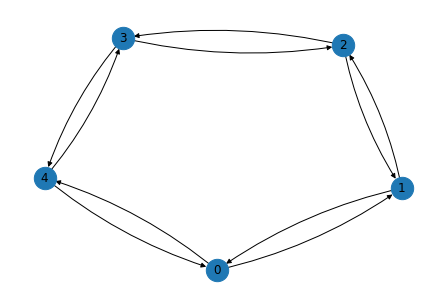

In [1163]:
show_graph(M)

## Eigenvalues

- the biggest eigenvale is 2 it is simple
- for any k-regular graph k is the biggest eigenvalue

## Question :

What is the eigenvector ?


In [962]:
vals, vecs = np.linalg.eig(M)
vals

array([-1.61803399,  0.61803399,  2.        , -1.61803399,  0.61803399])

## Strange ?

We'll see why these are the same numbers as the eigenvalues

In [1095]:
T = np.linspace(0, 2*np.pi/2,6)[:-1]
2*np.cos(T)

array([ 2.        ,  1.61803399,  0.61803399, -0.61803399, -1.61803399])

## Nombre d'or

Ce nombre irrationnel est l'unique solution positive de l'équation x2 = x + 1. Il vaut :

$\varphi ={\frac {1+{\sqrt {5}}}{2}}\approx 1{,}6180339887$

Il intervient dans la construction du pentagone régulier. Ses propriétés algébriques le lient à la suite de Fibonacci et au corps quadratique ℚ(√5). Le nombre d'or s'observe aussi dans la nature (quelques phyllotaxies, par exemple chez les capitules du tournesol, pavage de Penrose de quasi-cristaux) ou dans quelques œuvres et monuments (architecture de Le Corbusier, musique de Xenakis, peinture de Dalí).

[source : wiki](https://fr.wikipedia.org/wiki/Nombre_d'or)

In [1045]:
(1 + np.sqrt(5))/2

1.618033988749895

In [975]:
k = 1
vv = vecs[:,k]/min(abs(vecs[:,k]))
vals[k], vv


(0.6180339887498951,
 array([-3.23606798, -1.        ,  2.61803399,  2.61803399, -1.        ]))

## Another observation

this is very funny - there must be a good reason for this

- the sum of the coefficients is practically  0

In [1028]:
sum(vv)

8.881784197001252e-16

In [1009]:
vecs

array([[ 0.63245553, -0.63245553, -0.4472136 ,  0.11744232, -0.03299344],
       [-0.51166727, -0.19543951, -0.4472136 ,  0.27026972,  0.59048639],
       [ 0.19543951,  0.51166727, -0.4472136 , -0.55474791,  0.39793411],
       [ 0.19543951,  0.51166727, -0.4472136 ,  0.62733125, -0.34454959],
       [-0.51166727, -0.19543951, -0.4472136 , -0.46029538, -0.61087746]])

{0: '-3.24', 1: '-1.00', 2: '2.62', 3: '2.62', 4: '-1.00'}

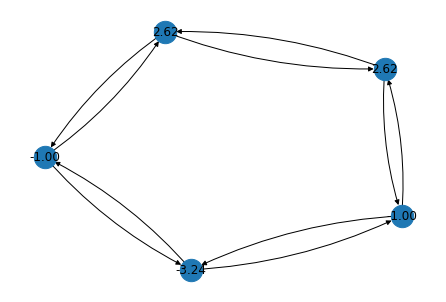

In [977]:
my_labels = {i: "{:.2f}".format(x) for i,x in  enumerate(vv) }
# if k = 2 my_labels[6] = 3


show_graph(M, my_labels=my_labels)
my_labels

---

## Visualising the eigenvector

If we put the value of the coordinate $\vec{v}_i$ on the i th vertex then 
$ (M. \vec{v})_i = v_{i-1} + v_{i+1}  = \lambda \vec{v}_i $

Drawing the graph as a pentagon this means
that the value at a vertex is
$\lambda$ times the sum of the endpoints of the diagonal in the pentagram.

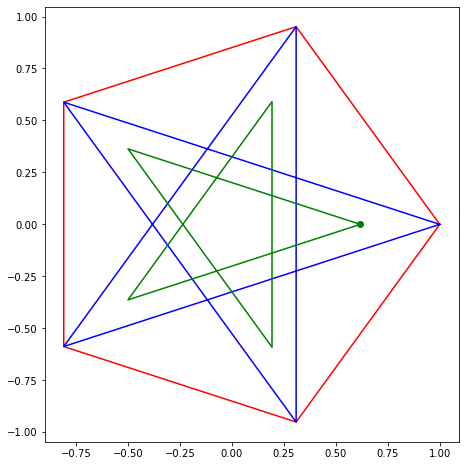

In [1123]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
ax.set_aspect('equal')

n = 5
s = 2
T = np.linspace(0,2*np.pi, n+1)
pentagon = np.exp(1J*T)
plt_cplx(pentagon, ax=ax)
pentagram = np.exp(s*1J*T)
plt_cplx(pentagram, ax=ax, sty='b')

# don't take the midpoint take the **sum** of adjacent values
medians = pentagram[1:] + pentagram[:-1] 
plt_cplx( medians, ax=ax, sty='g')
plt_cplx( [medians[0],medians[-1]], ax=ax, sty='g')
#find a formula for this
pt = medians[abs(medians.imag) == min(abs(medians.imag))]
plt_cplx( [pt], ax=ax, sty='go')

## Final observation

This means that 

- the green pentagram  is a rescaling of the blue one
- the scaling factor is the eigenvalue because of the value of ```medians[2]```

```medians[2]``` is the only vertex on the real line $\mathbb{R}$.



In [1060]:
medians[2]

(0.6180339887498949-1.1102230246251565e-16j)

## What does this mean ?

In [1044]:
vec = pentagon.real[:-1]
np.dot(M, vec) / vec

array([0.61803399, 0.61803399, 0.61803399, 0.61803399, 0.61803399])

In [1040]:
T = np.linspace(0,2*np.pi, 6)
pentagon = np.exp(1J*T + .2)
vec = pentagon.real[:-1]
np.dot(M, vec) / vec

array([0.61803399, 0.61803399, 0.61803399, 0.61803399, 0.61803399])

---

## Exo :

1. Modify the construction and find the eigenvectors for  -1.61803399
2. Label the axes and give a title
2. Put labels on the points and the medians
2. Can you do the same thing for a square ie n= 4 ?
2. For n = 7 ?


## Exo :


Draw the [pentagon fractal](https://mathimages.swarthmore.edu/index.php/Pentagonal_Fractal).


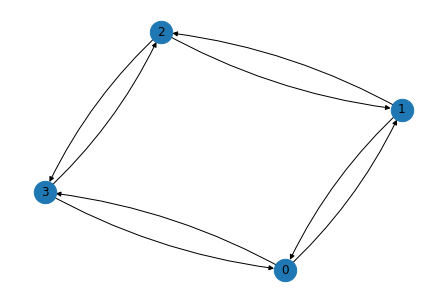

In [1062]:
n = 4
M = np.zeros((n,n),dtype =np.int)
M[:-1,1:] = np.identity(n-1)

M[-1,0] =1

M = M + M.T
show_graph(M)

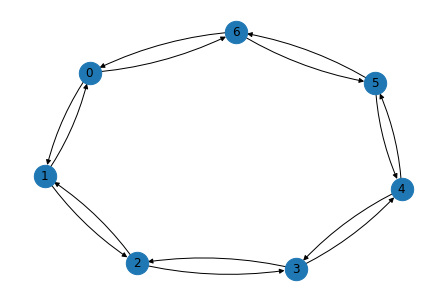

In [1280]:
n = 7
M = np.identity(n,dtype =np.int)
# this slides everything over by 1
M = np.roll(M,1, axis=1)


#what does this do ?
M = M + M.T
show_graph(M)

In [1278]:
vals, vecs = np.linalg.eig(M)
vals

array([-1.61803399,  0.61803399,  2.        , -1.61803399,  0.61803399])

---

# A 3 regular graph

In [1140]:
np.roll(np.identity(4), 1, axis = 1)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [1180]:
M = np.zeros((8,8), dtype=int)

C_4 = np.roll(np.identity(4), 1, axis = 0)

#two circulant graphs
M[4:,4:] = M[:4,:4] = C_4
#and this joins them
M[:4,4:] = C_4

M = M + M.T
M

array([[0, 1, 0, 1, 0, 0, 0, 1],
       [1, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 0]])

In [1181]:
#check is regular
M.sum(axis=0)

array([3, 3, 3, 3, 3, 3, 3, 3])

In [1178]:
#check that the degree is an eigenvalue
np.dot(M, np.ones(M.shape[0]))

array([3., 3., 3., 3., 3., 3., 3., 3.])

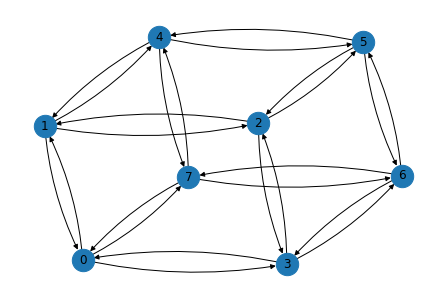

In [1179]:
show_graph(M)

# Observation

- no pair of even numbers are adjacent
- no pair of odd numbers are adjacent

so every pair of indicies  is either (1,0) or (0,1) mod 2

## Check :

In [1173]:
X, Y =  np.where(M == 1) 
(X % 2) + (Y  % 2)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [1167]:
vals, vecs = np.linalg.eig(M)
vals

array([-1.61803399,  0.61803399,  2.        , -1.61803399,  0.61803399])

In [1132]:
vecs[:,1]/vecs[0,0]

array([ 1., -1.,  1., -1., -1.,  1., -1.,  1.])

In [1136]:
k = 2
vv = vecs[:,k]/min(abs(vecs[:,k]))
vv = vv
vals[k], vv

(1.0000000000000007, array([-3., -1.,  1., -1., -1.,  1.,  3.,  1.]))

## Question :

Is there a geometric reason why -1 and 1 have multiplicity 3 ?

In [880]:
np.dot(M,vv)

array([ 3., -1., -1., -1., -1., -1.,  3., -1.])

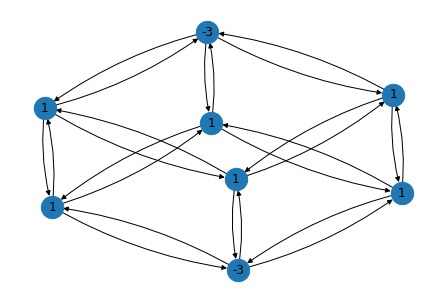

{0: -3, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: -3, 7: 1}

In [879]:
my_labels = {i: int(vv[i]) for i in range(8)}
# if k = 2 my_labels[6] = 3

show_graph(M, my_labels=my_labels)
my_labels

In [897]:
M = np.ones((4,4), dtype=np.int)
M = M - np.identity(4)
M

array([[0., 1., 1., 1.],
       [1., 0., 1., 1.],
       [1., 1., 0., 1.],
       [1., 1., 1., 0.]])

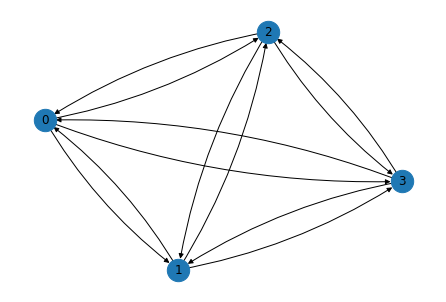

In [898]:
show_graph(M)

In [904]:
vals, vecs = np.linalg.eig(M)
vals

array([-1.,  3., -1., -1.])

In [905]:
k = 0
vv = vecs[:,k]/min(abs(vecs[:,k]))
vv = vv
vals[k], vv

(-1.0, array([-3.,  1.,  1.,  1.]))

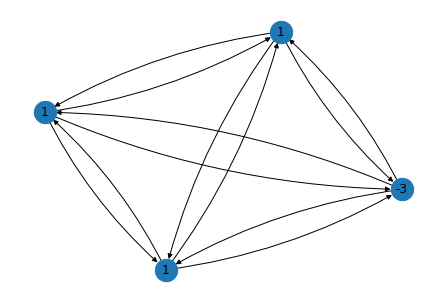

{0: -3, 1: 1, 2: 1, 3: 1}

In [907]:
my_labels = {i: int(x) for i,x in  enumerate(vv) }
# if k = 2 my_labels[6] = 3

show_graph(M, my_labels=my_labels)
my_labels

# why is -1 only multiplicity 3 and not  4 ?

In [913]:
v_space = np.ones((4,4), dtype= int) - 4*np.identity(4)
v_space

array([[-3.,  1.,  1.,  1.],
       [ 1., -3.,  1.,  1.],
       [ 1.,  1., -3.,  1.],
       [ 1.,  1.,  1., -3.]])

In [914]:
np.linalg.det(v_space)

0.0

## Exo 

- What about the octohedron ?
- What about the complete graph on n vertices ?

In [1]:
with open('graph.csv','w') as fp:
    fp.write(''',a,b,c,d
a,0,1,0,1
b,1,0,1,0
c,0,1,0,1
d,1,0,1,0''')

In [ ]:
pwd

